# Project 1  
### The Moonshadow Elves  
* Hongmei Zeng  
* Noah Stettler  
* Patrick Harrington  
* Yacub Bholat  
  
Due: 13 January 2020  

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests

In [2]:
path = os.path.join('Data', 'SeriesReport-20200112162716_5da8f4.csv')
df = pd.read_csv(path)
df.head(20)

,Local Area Unemployment Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Original Data Value,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,"LAUCT480500000000003,LAUCT480500000000004,LAUC...",NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN
4,Area:,"Austin city, TX",NaN,NaN,NaN,NaN
5,Area Type:,"Cities and towns above 25,000 population",NaN,NaN,NaN,NaN
6,State/Region/Division:,Texas,NaN,NaN,NaN,NaN
7,Years:,2010 to 2019,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,Year,Period,labor force,employment,unemployment,unemployment rate


In [3]:
cleaned_df = df.drop([0,1,2,3,4,5,6,7,8,9])
cleaned_df.head()

,Local Area Unemployment Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
10,2010,Jan,459941,429426,30515,6.6
11,2010,Feb,461604,432263,29341,6.4
12,2010,Mar,464429,435535,28894,6.2
13,2010,Apr,470021,441713,28308,6.0
14,2010,May,467577,439559,28018,6.0


In [4]:
names = {'Local Area Unemployment Statistics': 'Year',
         'Unnamed: 1': 'Month',
         'Unnamed: 2': 'Labor Force',
         'Unnamed: 3': 'Employment',
         'Unnamed: 4': 'Unemployment',
         'Unnamed: 5': 'Unemployment Rate %' }
cleaned_df = cleaned_df.rename(columns=names)
cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df.tail(10)

,Year,Month,Labor Force,Employment,Unemployment,Unemployment Rate %
118,2019,Feb,588274,571850,16424,2.8
119,2019,Mar,587038,572088,14950,2.5
120,2019,Apr,585655,573240,12415,2.1
121,2019,May,585176,573123,12053,2.1
122,2019,Jun,588644,573957,14687,2.5
123,2019,Jul,588780,573254,15526,2.6
124,2019,Aug,584711,569621,15090,2.6
125,2019,Sep,590052,575793,14259,2.4
126,2019,Oct,594759,580749,14010,2.4
127,2019,Nov,597139,583073,14066,2.4


In [5]:
cleaned_df['Labor Force'] = cleaned_df['Labor Force'].astype('int')
cleaned_df['Employment'] = cleaned_df['Employment'].astype('int')
cleaned_df['Unemployment'] = cleaned_df['Unemployment'].astype('int')
cleaned_df['Unemployment Rate %'] = cleaned_df['Unemployment Rate %'].astype('float')

In [6]:
cleaned_df['Employment Rate %'] = ((cleaned_df['Employment'] / cleaned_df['Labor Force']) * 100).round(1) 
cleaned_df.head(10)

,Year,Month,Labor Force,Employment,Unemployment,Unemployment Rate %,Employment Rate %
0,2010,Jan,459941,429426,30515,6.6,93.4
1,2010,Feb,461604,432263,29341,6.4,93.6
2,2010,Mar,464429,435535,28894,6.2,93.8
3,2010,Apr,470021,441713,28308,6.0,94.0
4,2010,May,467577,439559,28018,6.0,94.0
5,2010,Jun,469417,439255,30162,6.4,93.6
6,2010,Jul,469724,439522,30202,6.4,93.6
7,2010,Aug,470685,441294,29391,6.2,93.8
8,2010,Sep,471843,443168,28675,6.1,93.9
9,2010,Oct,474470,446328,28142,5.9,94.1


In [7]:
new_df = cleaned_df[['Year','Month','Labor Force','Employment','Employment Rate %','Unemployment','Unemployment Rate %']]
new_df.head(20)

,Year,Month,Labor Force,Employment,Employment Rate %,Unemployment,Unemployment Rate %
0,2010,Jan,459941,429426,93.4,30515,6.6
1,2010,Feb,461604,432263,93.6,29341,6.4
2,2010,Mar,464429,435535,93.8,28894,6.2
3,2010,Apr,470021,441713,94.0,28308,6.0
4,2010,May,467577,439559,94.0,28018,6.0
5,2010,Jun,469417,439255,93.6,30162,6.4
6,2010,Jul,469724,439522,93.6,30202,6.4
7,2010,Aug,470685,441294,93.8,29391,6.2
8,2010,Sep,471843,443168,93.9,28675,6.1
9,2010,Oct,474470,446328,94.1,28142,5.9


In [8]:
# Delete the Data of the year 2019
new_df = new_df[new_df.Year != '2019']
new_df

,Year,Month,Labor Force,Employment,Employment Rate %,Unemployment,Unemployment Rate %
0,2010,Jan,459941,429426,93.4,30515,6.6
1,2010,Feb,461604,432263,93.6,29341,6.4
2,2010,Mar,464429,435535,93.8,28894,6.2
3,2010,Apr,470021,441713,94.0,28308,6.0
4,2010,May,467577,439559,94.0,28018,6.0
...,...,...,...,...,...,...,...
112,2018,Sep,580538,564680,97.3,15858,2.7
113,2018,Oct,581771,566677,97.4,15094,2.6
114,2018,Nov,583833,568948,97.5,14885,2.5
115,2018,Dec,583178,568316,97.5,14862,2.5


In [9]:
yearly_df = new_df[new_df.Month=='Annual'].drop(columns=['Month'])
yearly_df.set_index(['Year'], inplace = True)
yearly_df

,Labor Force,Employment,Employment Rate %,Unemployment,Unemployment Rate %
Year,,,,,
2010,469287,440312,93.8,28975,6.2
2011,483618,455426,94.2,28192,5.8
2012,498207,473046,94.9,25161,5.1
2013,513750,489962,95.4,23788,4.6
2014,528511,508899,96.3,19612,3.7
2015,537448,521407,97.0,16041,3.0
2016,555755,538632,96.9,17123,3.1
2017,561212,544462,97.0,16750,3.0
2018,579048,563154,97.3,15894,2.7


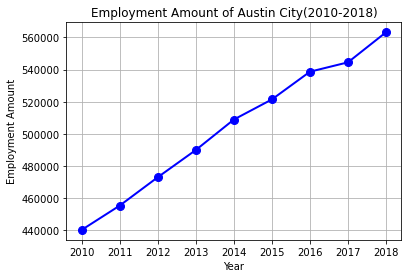

In [10]:
x = yearly_df.index
y = yearly_df["Employment"]
plt.plot(x, y,color='blue', marker='o', linewidth=2, markersize=8)

plt.xlabel('Year')
plt.ylabel('Employment Amount')
plt.title('Employment Amount of Austin City(2010-2018)', fontsize=12)
plt.grid(axis='both', linestyle='-')
plt.savefig('Fig1 Employment Amount.png')
plt.show()

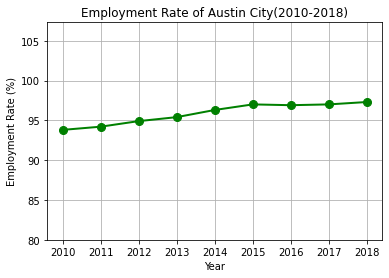

In [11]:
x = yearly_df.index
y = yearly_df['Employment Rate %']
plt.plot(x, y,color='green', marker='o', linewidth=2, markersize=8)

plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.title('Employment Rate of Austin City(2010-2018)', fontsize=12)
plt.ylim(80, max(y) + 10)
plt.grid(axis='both', linestyle='-')
plt.savefig('Fig2 Employment Rate.png')
plt.show()

In [12]:
monthly_df = new_df[new_df.Month!='Annual']
monthly_df

,Year,Month,Labor Force,Employment,Employment Rate %,Unemployment,Unemployment Rate %
0,2010,Jan,459941,429426,93.4,30515,6.6
1,2010,Feb,461604,432263,93.6,29341,6.4
2,2010,Mar,464429,435535,93.8,28894,6.2
3,2010,Apr,470021,441713,94.0,28308,6.0
4,2010,May,467577,439559,94.0,28018,6.0
...,...,...,...,...,...,...,...
111,2018,Aug,576321,559684,97.1,16637,2.9
112,2018,Sep,580538,564680,97.3,15858,2.7
113,2018,Oct,581771,566677,97.4,15094,2.6
114,2018,Nov,583833,568948,97.5,14885,2.5


In [13]:
monthly_employment_df = pd.pivot_table(monthly_df, 
                            index='Year',
                            columns='Month', 
                            values='Employment')
monthly_employment_df = monthly_employment_df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
monthly_employment_df

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2010,429426,432263,435535,441713,439559,439255,439522,441294,443168,446328,448216,447466
2011,446369,450065,452269,455625,454697,452557,452304,454077,457796,461506,464337,463515
2012,463553,466017,468070,469982,470140,470366,470619,470441,477432,482280,484754,482892
2013,479852,482261,483724,489336,489848,489323,489982,489587,493319,492863,500207,499243
2014,500177,503872,507006,508974,507846,508482,508256,506943,510125,514479,516559,514066
2015,510475,513302,515701,520475,521735,521578,520295,520121,523475,526935,531147,531639
2016,527768,532700,534942,537069,536757,538017,539924,537855,541457,544403,546911,545780
2017,532823,537363,539351,543231,542377,543207,545644,542757,550443,550725,552736,552882
2018,553965,560332,560393,563090,563062,563320,565383,559684,564680,566677,568948,568316


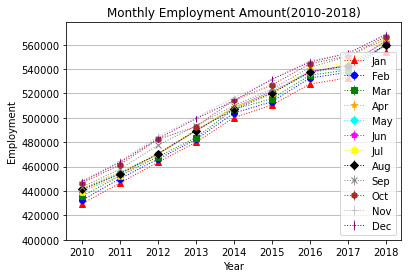

<Figure size 1080x648 with 0 Axes>

In [14]:
colors = ['red', 'blue', 'green', 'orange','cyan', 'magenta', 'yellow', 'black', 'grey','brown','silver', 'purple']
markers = ['^', 'o', 's', '*', '8', 'p', 'X', 'D', 'x', 'h', '+', '|']

x = monthly_employment_df.index 
for column, i in zip(monthly_employment_df.columns, range(len(monthly_employment_df.columns))):
    y = monthly_employment_df[column]
    plt.errorbar(x, y, yerr=3, elinewidth=0.8, 
                 color=colors[i], marker=markers[i], 
                 linestyle=':', linewidth=1,
                 errorevery=1, label=column)
    
plt.xlabel('Year')
plt.ylabel('Employment')
plt.title('Monthly Employment Amount(2010-2018)', fontsize=12)
plt.legend(loc='lower right')
plt.ylim(400000, max(y) + 10000)
plt.grid(axis='y', linestyle='-')
plt.figure(figsize=(15,9))
plt.savefig('Fig3 Monthly Employment Amount.png')
plt.show()

In [15]:
monthly_employment_rate_df = pd.pivot_table(monthly_df, 
                            index='Year',
                            columns='Month', 
                            values='Employment Rate %')
monthly_employment_rate_df = monthly_employment_rate_df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
monthly_employment_rate_df

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2010,93.4,93.6,93.8,94.0,94.0,93.6,93.6,93.8,93.9,94.1,94.0,94.3
2011,93.9,94.1,94.3,94.4,94.3,93.7,93.7,93.9,93.9,94.3,94.7,94.9
2012,94.5,94.7,94.9,95.2,95.0,94.5,94.5,94.8,95.2,95.3,95.5,95.4
2013,94.7,95.1,95.3,95.6,95.4,94.9,95.0,95.3,95.4,95.5,95.9,96.2
2014,95.9,96.0,96.1,96.7,96.3,96.1,95.9,96.0,96.3,96.5,96.7,97.0
2015,96.6,96.9,97.1,97.3,97.0,96.9,96.8,97.0,97.0,97.1,97.2,97.3
2016,96.9,97.0,97.0,97.3,97.2,96.8,96.6,96.7,96.7,96.8,96.9,97.0
2017,96.6,96.7,96.9,97.2,97.1,96.9,96.9,96.8,97.1,97.3,97.2,97.3
2018,97.1,97.1,97.1,97.4,97.5,97.0,97.1,97.1,97.3,97.4,97.5,97.5


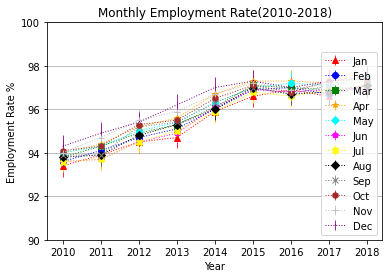

<Figure size 1080x648 with 0 Axes>

In [16]:
colors = ['red', 'blue', 'green', 'orange','cyan', 'magenta', 'yellow', 'black', 'grey','brown','silver', 'purple']
markers = ['^', 'o', 's', '*', '8', 'p', 'X', 'D', 'x', 'h', '+', ',']

x = monthly_employment_rate_df.index 
for column, i in zip(monthly_employment_rate_df.columns, range(len(monthly_employment_rate_df.columns))):
    y = monthly_employment_rate_df[column]
    plt.errorbar(x, y, yerr=0.5, elinewidth=0.8, 
                 color=colors[i], marker=markers[i], 
                 linestyle=':', linewidth=1,
                 errorevery=1, label=column)
    
plt.xlabel('Year')
plt.ylabel('Employment Rate %')
plt.title('Monthly Employment Rate(2010-2018)', fontsize=12)
plt.legend(loc='lower right')
plt.ylim(90, max(y) + 2.5)
plt.grid(axis='y', linestyle='-')
plt.figure(figsize=(15,9))
plt.savefig('Fig4 Monthly Employment Rate.png')
plt.show()

In [17]:
monthly_df

,Year,Month,Labor Force,Employment,Employment Rate %,Unemployment,Unemployment Rate %
0,2010,Jan,459941,429426,93.4,30515,6.6
1,2010,Feb,461604,432263,93.6,29341,6.4
2,2010,Mar,464429,435535,93.8,28894,6.2
3,2010,Apr,470021,441713,94.0,28308,6.0
4,2010,May,467577,439559,94.0,28018,6.0
...,...,...,...,...,...,...,...
111,2018,Aug,576321,559684,97.1,16637,2.9
112,2018,Sep,580538,564680,97.3,15858,2.7
113,2018,Oct,581771,566677,97.4,15094,2.6
114,2018,Nov,583833,568948,97.5,14885,2.5


In [18]:
monthly_df['Year-Month'] = monthly_df['Year'] + '-' + monthly_df['Month']
monthly_df

C:\Users\Mei\.virtualenvs\project-1-Hxq301S8\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,Labor Force,Employment,Employment Rate %,Unemployment,Unemployment Rate %,Year-Month
0,2010,Jan,459941,429426,93.4,30515,6.6,2010-Jan
1,2010,Feb,461604,432263,93.6,29341,6.4,2010-Feb
2,2010,Mar,464429,435535,93.8,28894,6.2,2010-Mar
3,2010,Apr,470021,441713,94.0,28308,6.0,2010-Apr
4,2010,May,467577,439559,94.0,28018,6.0,2010-May
...,...,...,...,...,...,...,...,...
111,2018,Aug,576321,559684,97.1,16637,2.9,2018-Aug
112,2018,Sep,580538,564680,97.3,15858,2.7,2018-Sep
113,2018,Oct,581771,566677,97.4,15094,2.6,2018-Oct
114,2018,Nov,583833,568948,97.5,14885,2.5,2018-Nov


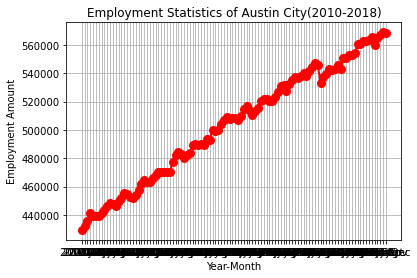

<Figure size 1080x648 with 0 Axes>

In [19]:
x = monthly_df['Year-Month']
y = monthly_df["Employment"]
plt.plot(x, y,color='red', marker='o', linewidth=2, markersize=8)

plt.xlabel('Year-Month')
plt.ylabel('Employment Amount')
plt.title('Employment Statistics of Austin City(2010-2018)', fontsize=12)
plt.grid(axis='both', linestyle='-')
plt.figure(figsize=(15,9))
plt.savefig('Fig5 Employment Statistics.png')
plt.show()